In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

def legend_title_left(leg):
    c = leg.get_children()[0]
    title = c.get_children()[0]
    hpack = c.get_children()[1]
    c._children = [hpack]
    hpack._children = [title] + hpack.get_children()    

# $\ell_1$-regularized Huber

## Figure 2: Empirical verification with $t_2$-distributed noises

In [2]:
sigma = 1.
eps = .01
dist = 't-2'
M_list = np.array([1,2,5,50, np.inf])
M_str = np.r_[M_list[:-1].astype(int).astype(str), ['$\infty$']]
palette = sns.color_palette("magma_r", len(M_str))
path_result = 'result/huber_l1/emp/'

phi = 0.1
df_the = []
df_est = []
df_gcv = []
for (lam, mu) in [[2e-1, 1], [2e-1,5]]:
    psi_max = 2
    
    df = pd.read_pickle(path_result+'res_risk_{}_phi_{:.01f}.pkl'.format(dist,phi), compression='gzip')
    _df = df[(df['lam']==lam)&(df['mu']==mu)&(df['psi']<psi_max)]
    _df = _df.drop_duplicates(['phi','psi','lam','mu'])
    df = pd.DataFrame(
        np.c_[
            _df['psi'],
            _df['R1'].values[:,None] / M_list[None,:] + _df['Rinf'].values[:,None] * (1-1/M_list[None,:]),
        ], columns=['psi']+['R-{}'.format(M) for M in M_str]
        )
    df = pd.wide_to_long(df,  stubnames='R', i=['psi'], j='M', sep='-', suffix=r'.*')
    df_the.append(df)

    
    df = pd.read_pickle(path_result+'res_est_{}_phi_{:.01f}.pkl'.format(dist,phi), compression='gzip')
    df = df[(df['lam']==lam)&(df['mu']==mu)&(df['psi']<psi_max)]
    _df = df.drop_duplicates(['phi','psi','lam','mu','seed'])
    _df.loc[:,'Rinf'] = np.round(_df['Rinf'], 5)
    _df = _df[_df['lam']==lam]
    df = pd.DataFrame(
        np.c_[
            _df[['psi','seed']],
            _df['R1'].values[:,None] / M_list[None,:] + _df['Rinf'].values[:,None] * (1-1/M_list[None,:]),
        ], columns=['psi','seed']+['R-{}'.format(M) for M in M_str]
        )
    df = pd.wide_to_long(df,  stubnames='R', i=['psi','seed'], j='M', sep='-', suffix=r'.*').reset_index()
    df = df[df['M']!='$\infty$']
    df_est.append(df)

    df = pd.read_pickle(path_result+'res_gcv_full_{}_phi_{:.01f}.pkl'.format(dist,phi), compression='gzip')
    df = df[(df['lam']==lam)&(df['mu']==mu)&(df['psi']<psi_max)]
    _df = df.drop_duplicates(['phi','psi','lam','mu','seed'])
    _df.loc[:,'Rinf'] = np.round(_df['Rinf'], 5)
    _df = _df[_df['lam']==lam]
    df = pd.DataFrame(
        np.c_[
            _df[['psi','seed']],
            _df['R1'].values[:,None] / M_list[None,:] + _df['Rinf'].values[:,None] * (1-1/M_list[None,:]),
        ], columns=['psi','seed']+['R-{}'.format(M) for M in M_str]
        )
    df = pd.wide_to_long(df,  stubnames='R', i=['psi','seed'], j='M', sep='-', suffix=r'.*').reset_index()
    df = df[df['M']!='$\infty$']
    df_gcv.append(df)

/tmp/ipykernel_3653539/2307227119.py:12: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.lineplot(_df, x='psi', y='R', hue='M', alpha=0.5, errorbar=None, linestyle='dashed', marker='o', palette = palette, ax=axes[i])
/tmp/ipykernel_3653539/2307227119.py:17: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.lineplot(_df, x='psi', y='R', hue='M', linestyle=':', marker='s', palette = palette, ax=axes[i], estimator='median')
/tmp/ipykernel_3653539/2307227119.py:12: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.lineplot(_df, x='psi', y='R', hue='M', alpha=0.5, errorbar=None, linestyle='dashed', marker='o', palette = palette, ax=axes[i])
/tmp/ipykernel_3653539/2307227119.py:17: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.lineplot(_df, x='psi', y='R', hue='M', linestyle=':', marker='s

['1', '2', '5', '50', '$\\infty$', '1', '2', '5', '50', '1', '2', '5', '50']


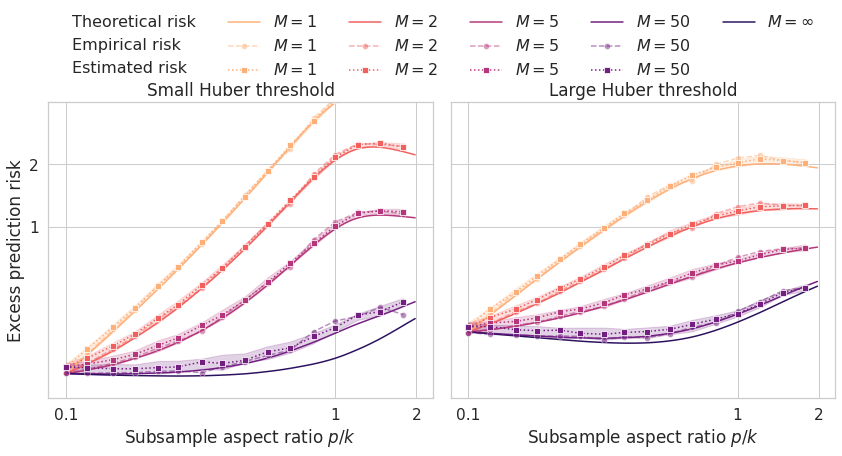

In [3]:
import matplotlib.lines as mlines
sns.set(font_scale=1.4)
sns.set_style("whitegrid")

fig, axes = plt.subplots(1,2, figsize=(12,6.5), sharex=True, sharey=True)

for i in range(2):
    _df = df_the[i].copy().reset_index()
    sns.lineplot(_df, x='psi', y='R', hue='M', errorbar=None, palette = palette, ax=axes[i])
    _df = df_est[i].copy().reset_index()
    _df = _df[_df['psi'].isin(np.unique(_df['psi']))]
    sns.lineplot(_df, x='psi', y='R', hue='M', alpha=0.5, errorbar=None, linestyle='dashed', marker='o', palette = palette, ax=axes[i])


    _df = df_gcv[i].copy().reset_index()
    _df = _df[_df['psi'].isin(np.unique(_df['psi']))]
    sns.lineplot(_df, x='psi', y='R', hue='M', linestyle=':', marker='s', palette = palette, ax=axes[i], estimator='median')

for ax in axes:
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('Subsample aspect ratio $p/k$')
axes[0].set_ylabel('Excess prediction risk')
axes[1].set_ylabel('')

for j in range(1):
    axes[j].set_xticks([])
    axes[j].set_xticks([], minor=True)
    ticks = [0.1,1, 2]
    axes[j].set_xticks(ticks)
    axes[j].set_xticklabels(['0.1','1','2'])
    
j = 0
axes[j].set_ylim([1.5e-1,4.])
axes[j].set_yticks([])
axes[j].set_yticks([], minor=True)
ticks = [1,2]
axes[j].set_yticks(ticks)
axes[j].set_yticklabels(['{:.0f}'.format(i) for i in ticks])

axes[0].set_title('Small Huber threshold')
axes[1].set_title('Large Huber threshold')

lines_labels = [ax.get_legend_handles_labels() for ax in [axes[0]]]
handles, labels = [sum(lol, []) for lol in zip(*lines_labels)]

for j in range(2):
    axes[j].get_legend().remove()
labels = ['Theoretical risk', 'Empirical risk', 'Estimated risk',
          '$M=1$', '$M=1$', '$M=1$',
          '$M=2$', '$M=2$', '$M=2$',
          '$M=5$', '$M=5$', '$M=5$',
          '$M=50$', '$M=50$', '$M=50$',
          '$M=\infty$', ''
          ]
handles = [mlines.Line2D([], [], linestyle='None'), mlines.Line2D([], [], linestyle='None'), mlines.Line2D([], [], linestyle='None'),
          handles[0], handles[5], handles[9], 
          handles[1], handles[6], handles[10], 
          handles[2], handles[7], handles[11], 
          handles[3], handles[8], handles[12], 
          handles[4], mlines.Line2D([], [], linestyle='None'),
          ]

legend = fig.legend(handles=handles, labels=labels,
                    loc=9, ncol=6, title='', frameon=False, fontsize=16)
legend_title_left(legend)

fig.tight_layout()
fig.subplots_adjust(top=0.78)
plt.savefig('result/fig_huber_l1_risk_M_{}.pdf'.format(dist), bbox_inches='tight', pad_inches=0, dpi=300)


## Empirical verification with $t_5$-distributed noises

In [4]:
sigma = 1.
eps = .01
dist = 't-5'
M_list = np.array([1,2,5,50, np.inf])
M_str = np.r_[M_list[:-1].astype(int).astype(str), ['$\infty$']]
palette = sns.color_palette("magma_r", len(M_str))
path_result = 'result/huber_l1/emp/'

phi = 0.1
df_the = []
df_est = []
df_gcv = []
for (lam, mu) in [[2e-1, 1], [2e-1,5]]:
    psi_max = 2
    
    df = pd.read_pickle(path_result+'res_risk_{}_phi_{:.01f}.pkl'.format(dist,phi), compression='gzip')        
    _df = df[(df['lam']==lam)&(df['mu']==mu)&(df['psi']<psi_max)]
    _df = _df.drop_duplicates(['phi','psi','lam','mu'])
    df = pd.DataFrame(
        np.c_[
            _df['psi'],
            _df['R1'].values[:,None] / M_list[None,:] + _df['Rinf'].values[:,None] * (1-1/M_list[None,:]),
        ], columns=['psi']+['R-{}'.format(M) for M in M_str]
        )
    df = pd.wide_to_long(df,  stubnames='R', i=['psi'], j='M', sep='-', suffix=r'.*')
    df_the.append(df)

    
    df = pd.read_pickle(path_result+'res_est_{}_phi_{:.01f}.pkl'.format(dist,phi), compression='gzip')
    df = df[(df['lam']==lam)&(df['mu']==mu)&(df['psi']<psi_max)]
    _df = df.drop_duplicates(['phi','psi','lam','mu','seed'])
    _df.loc[:,'Rinf'] = np.round(_df['Rinf'], 5)
    _df = _df[_df['lam']==lam]
    df = pd.DataFrame(
        np.c_[
            _df[['psi','seed']],
            _df['R1'].values[:,None] / M_list[None,:] + _df['Rinf'].values[:,None] * (1-1/M_list[None,:]),
        ], columns=['psi','seed']+['R-{}'.format(M) for M in M_str]
        )
    df = pd.wide_to_long(df,  stubnames='R', i=['psi','seed'], j='M', sep='-', suffix=r'.*').reset_index()
    df = df[df['M']!='$\infty$']
    df_est.append(df)

    df = pd.read_pickle(path_result+'res_gcv_full_{}_phi_{:.01f}.pkl'.format(dist,phi), compression='gzip')
    df = df[(df['lam']==lam)&(df['mu']==mu)&(df['psi']<psi_max)]
    _df = df.drop_duplicates(['phi','psi','lam','mu','seed'])
    _df.loc[:,'Rinf'] = np.round(_df['Rinf'], 5)
    _df = _df[_df['lam']==lam]
    df = pd.DataFrame(
        np.c_[
            _df[['psi','seed']],
            _df['R1'].values[:,None] / M_list[None,:] + _df['Rinf'].values[:,None] * (1-1/M_list[None,:]),
        ], columns=['psi','seed']+['R-{}'.format(M) for M in M_str]
        )
    df = pd.wide_to_long(df,  stubnames='R', i=['psi','seed'], j='M', sep='-', suffix=r'.*').reset_index()
    df = df[df['M']!='$\infty$']
    df_gcv.append(df)

/tmp/ipykernel_3653539/4165133687.py:12: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.lineplot(_df, x='psi', y='R', hue='M', alpha=0.5, errorbar=None, linestyle='dashed', marker='o', palette = palette, ax=axes[i])
/tmp/ipykernel_3653539/4165133687.py:17: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.lineplot(_df, x='psi', y='R', hue='M', linestyle=':', marker='s', palette = palette, ax=axes[i], estimator='median')
/tmp/ipykernel_3653539/4165133687.py:12: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.lineplot(_df, x='psi', y='R', hue='M', alpha=0.5, errorbar=None, linestyle='dashed', marker='o', palette = palette, ax=axes[i])
/tmp/ipykernel_3653539/4165133687.py:17: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.lineplot(_df, x='psi', y='R', hue='M', linestyle=':', marker='s

['1', '2', '5', '50', '$\\infty$', '1', '2', '5', '50', '1', '2', '5', '50']


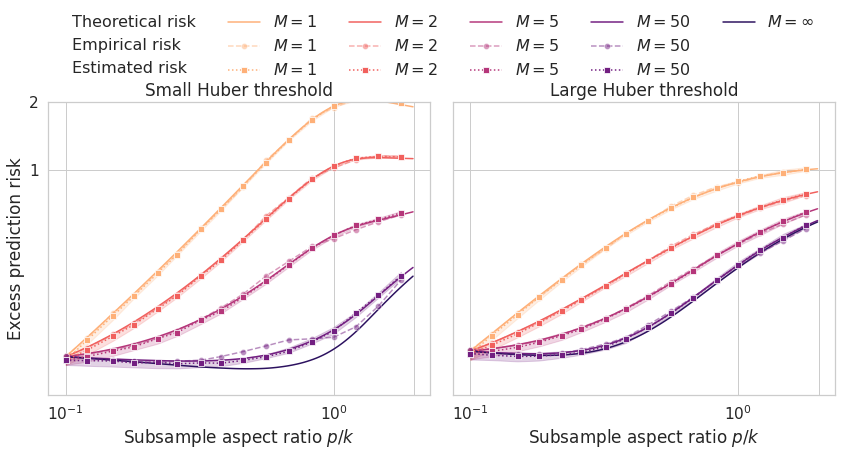

In [5]:
import matplotlib.lines as mlines
sns.set(font_scale=1.4)
sns.set_style("whitegrid")

fig, axes = plt.subplots(1,2, figsize=(12,6.5), sharex=True, sharey=True)

for i in range(2):
    _df = df_the[i].copy().reset_index()
    sns.lineplot(_df, x='psi', y='R', hue='M', errorbar=None, palette = palette, ax=axes[i])
    _df = df_est[i].copy().reset_index()
    _df = _df[_df['psi'].isin(np.unique(_df['psi']))]
    sns.lineplot(_df, x='psi', y='R', hue='M', alpha=0.5, errorbar=None, linestyle='dashed', marker='o', palette = palette, ax=axes[i])


    _df = df_gcv[i].copy().reset_index()
    _df = _df[_df['psi'].isin(np.unique(_df['psi']))]
    sns.lineplot(_df, x='psi', y='R', hue='M', linestyle=':', marker='s', palette = palette, ax=axes[i], estimator='median')

for ax in axes:
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('Subsample aspect ratio $p/k$')
axes[0].set_ylabel('Excess prediction risk')
axes[1].set_ylabel('')

for j in range(1):
    axes[j].set_xticks([])
    axes[j].set_xticks([], minor=True)
    ticks = [0.1,1,2] if j==0 else [1.1, 2]
    axes[j].set_xticks(ticks)
    if j ==1:
        axes[j].set_xticklabels(['1.1','2','5','10'])
    
j = 0
axes[j].set_ylim([1e-1,2.])
axes[j].set_yticks([])
axes[j].set_yticks([], minor=True)
ticks = [1,2]
axes[j].set_yticks(ticks)
axes[j].set_yticklabels(['{:.0f}'.format(i) for i in ticks])

axes[0].set_title('Small Huber threshold')
axes[1].set_title('Large Huber threshold')

lines_labels = [ax.get_legend_handles_labels() for ax in [axes[0]]]
handles, labels = [sum(lol, []) for lol in zip(*lines_labels)]
print(labels)
for j in range(2):
    axes[j].get_legend().remove()
labels = ['Theoretical risk', 'Empirical risk', 'Estimated risk',
          '$M=1$', '$M=1$', '$M=1$',
          '$M=2$', '$M=2$', '$M=2$',
          '$M=5$', '$M=5$', '$M=5$',
          '$M=50$', '$M=50$', '$M=50$',
          '$M=\infty$', ''
          ]
handles = [mlines.Line2D([], [], linestyle='None'), mlines.Line2D([], [], linestyle='None'), mlines.Line2D([], [], linestyle='None'),
          handles[0], handles[5], handles[9], 
          handles[1], handles[6], handles[10], 
          handles[2], handles[7], handles[11], 
          handles[3], handles[8], handles[12], 
          handles[4], mlines.Line2D([], [], linestyle='None'),
          ]

legend = fig.legend(handles=handles, labels=labels,
                    loc=9, ncol=6, title='', frameon=False, fontsize=16)
legend_title_left(legend)

fig.tight_layout()
fig.subplots_adjust(top=0.78)
plt.savefig('result/fig_huber_l1_risk_M_{}.pdf'.format(dist), bbox_inches='tight', pad_inches=0, dpi=300)


## Figure 3: Optimal risk in the data aspect ratio

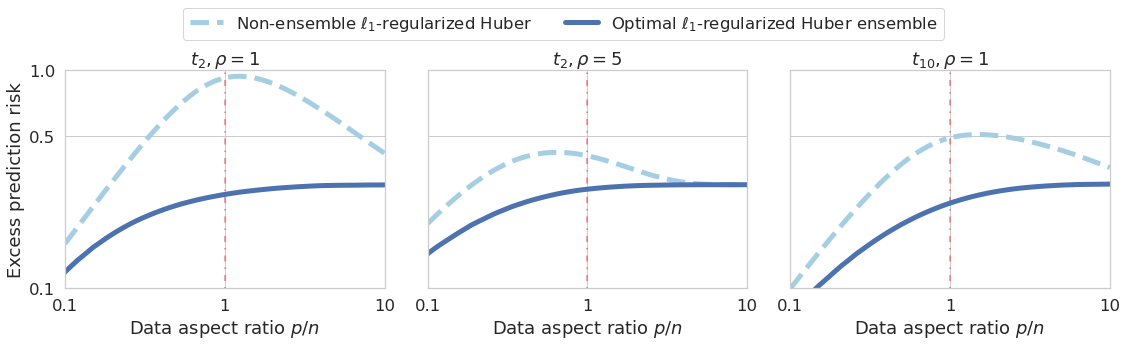

In [6]:
import matplotlib
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

ylim_list = np.array([[0.05, 0.8], [0.05, 0.8]]) + sigma2
y_text_list = [ylim_list[0][1]*0.95, ylim_list[1][0]*1.1]
style_order = ['Optimal bagged with repalcement', 'Optimal bagged without repalcement', 'Unbagged']

fig, axes = plt.subplots(1,3,figsize=(16,5), sharex=True, sharey=True,
                        gridspec_kw={'width_ratios': [1, 1, 1]})

cm = sns.color_palette('deep', len(style_order))
lw = 5

lam = 0.5
for j, (dist, mu) in enumerate([('t-2',1),('t-2',5),('t-10',1)]):
    axes[j].plot(
            np.ones(10), 
            np.linspace(1e-3, 1e2,10), dashes=[1, 4, 4, 4], color='red', alpha=0.5)

    axes[j].plot(np.linspace(1e-3, 1e1,10), np.ones(10), 
        dashes=[1, 4, 4, 4], color='red', alpha=0.5)

    sns.lineplot(data=opt[(opt['dist']==dist)&(opt['lam']==lam)&(opt['mu']==mu)&(opt['phi']<1.)], x='phi', y='R1', linewidth=lw, #label='Unbagged',
             linestyle='--', color=sns.color_palette("Paired")[0], ax=axes[j])
    sns.lineplot(data=opt[(opt['dist']==dist)&(opt['lam']==lam)&(opt['mu']==mu)&(opt['phi']>1.)], x='phi', y='R1', linewidth=lw, label='Non-ensemble $\ell_1$-regularized Huber',
                linestyle='--', color=sns.color_palette("Paired")[0], ax=axes[j])
    sns.lineplot(data=opt_wr[(opt_wr['dist']==dist)&(opt_wr['lam']==lam)&(opt_wr['mu']==mu)], x='phi', y='Rinf', linewidth=lw, label='Optimal $\ell_1$-regularized Huber ensemble', 
                ax=axes[j], color=sns.color_palette()[0])
    
    axes[j].legend(loc='lower right')
    axes[j].set_title(r'$t_{{{}}}, \rho={}$'.format(int(dist.split('-')[1]),mu))
    axes[j].set_xscale('log', base=10)
    axes[j].set_yscale('log', base=10)
    axes[j].set_xlim([0.1,10])
    axes[j].set_ylim([1e-1,1])
    
    ticks = np.logspace(-1,1,3)
    axes[j].set_xticks(ticks, ['0.1','1','10'])
    

    axes[j].set_ylabel('')
ticks = np.array([0.1,0.5,1])
axes[0].set_yticks(ticks, ['0.1','0.5','1'])
axes[0].get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axes[0].get_yaxis().set_minor_formatter(matplotlib.ticker.NullFormatter())


lines_labels = [ax.get_legend_handles_labels() for ax in [axes[1]]]
handles, labels = [sum(lol, []) for lol in zip(*lines_labels)]
for j in range(3):
    axes[j].set_xlabel('Data aspect ratio $p/n$')
    axes[j].get_legend().remove()
axes[0].set_ylabel('Excess prediction risk')

labels = ['Non-ensemble $\ell_1$-regularized Huber', 'Optimal $\ell_1$-regularized Huber ensemble']
legend = fig.legend(handles=handles, labels=labels, loc=9, ncol=9)
legend_title_left(legend)

fig.tight_layout()
fig.subplots_adjust(top=0.8)

plt.savefig('result/fig_l1_huber_opt_risk.pdf', bbox_inches='tight', pad_inches=0, dpi=300)

## Figure 12: Heatmap of unregularized Huber ensemble

In [7]:
path_result = 'result/huber/'

sigma = 1.
delta = 5
df_list = []
for dist in ['t-20','t-10','t-2']:
    df = pd.read_csv(path_result+'res_{}_sigma_{:.01f}.csv'.format(dist, sigma))
    df['psi'] = 1/delta / df['c']
    df_alpha = pd.pivot(df, index='lam', columns='psi', values='alpha')
    df_eta = pd.pivot(df, index='lam', columns='psi', values='eta')
    _df = df_alpha**2 * df_eta
    df_list.append(_df)

0.2707753854147182 0.27319521638303973 0.2707753854147182
0.3033702288649982 0.31452730680252033 0.3011981503374118


0.533185212651594 0.5806711366293261 0.527746894237203


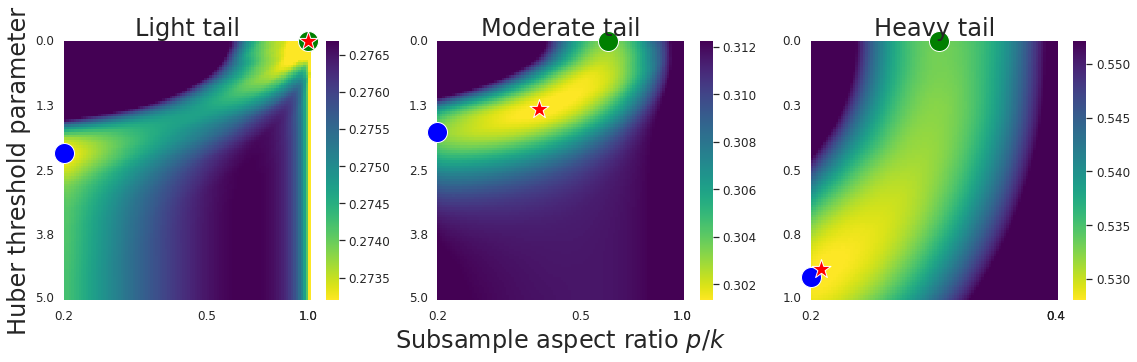

In [8]:
sns.set(font_scale=2.)
fig, axes = plt.subplots(1,3,figsize=(16,5))
cmap = sns.color_palette("viridis_r", as_cmap=True)
title_list = ['Light tail','Moderate tail','Heavy tail']
for j,dist in enumerate(['t-20','t-10','t-2']):
    _df = df_list[j]
    vmin=np.nanquantile(_df.values, 0.01)
    vmax=np.nanquantile(_df.values, 0.8)
    sns.heatmap(_df, cmap=sns.color_palette("viridis_r", as_cmap=True), ax=axes[j], vmin=vmin, vmax=vmax)

    n_grid = 100

    id_psi = _df.apply(np.argmin, axis=1).values

    id_c = np.where(np.array(_df.columns)==_df.iloc[0,::-1].idxmin())[0]
    id_lam = np.where(np.array(_df.index)==_df.iloc[:,0].idxmin())[0]

    axes[j].scatter(id_c, 0, color='green', s=400, 
            marker='o', edgecolor='white',clip_on=False, zorder=5)
    axes[j].scatter(0, id_lam, color='blue', s=400, 
            marker='o', edgecolor='white',clip_on=False, zorder=5)

    ids = np.where(_df.values==_df.values.min())
    axes[j].scatter(ids[1][0], ids[0][0], color='red', s=400, 
               marker='*', edgecolor='white',clip_on=False, zorder=5)
    print(_df.iloc[0,id_c].values[0], _df.iloc[id_lam,-1].values[0], _df.values[ids[0][0],ids[1][0]])
    if j==1:
        axes[j].set_xlabel('Subsample aspect ratio $p/k$')
    else:
        axes[j].set_xlabel('')
    if j==0:
        axes[j].set_ylabel('Huber threshold parameter')
    else:
        axes[j].set_ylabel('')
    axes[j].set_title(title_list[j], zorder=6)

    ticks = [np.argmin(np.abs(np.array(_df.columns)-t)) for t in [0.1,0.5,1.,2]]
    lams = np.array(_df.columns)[ticks]
    axes[j].set_xticks(ticks)
    axes[j].set_xticklabels([ f"{x:.01f}" if x<1 else f"{x:.0f}" for x in lams ], rotation=0, fontsize=12)

    ticks = np.append(np.arange(0,n_grid,25), n_grid-1)
    lams = np.array(_df.index)[ticks]
    axes[j].set_yticks(ticks)
    axes[j].set_yticklabels([ f"{x:.01f}" if x<1 else f"{x:.1f}" for x in lams ], fontsize=12)
    axes[j].figure.axes[-1].tick_params(labelsize=12)


fig.tight_layout()
# fig.subplots_adjust(top=0.85)
plt.savefig('result/fig_huber_sigma_{:.01f}.pdf'.format(sigma), bbox_inches='tight', pad_inches=0, dpi=300)


## Figure 13: Heatmap with fixed Lasso penalty $\lambda$

In [9]:
path_result = 'result/huber_l1/fixed_lam/'
sigma = 1.
lam = 5e-1
df_list = []
for dist in ['t-20','t-10','t-2']:
    df = pd.read_csv(path_result+'res_{}_sigma_{:.01f}.csv'.format(dist, sigma))
    
    df = df[df['lam']==lam].reset_index(drop=True)
    df['psi'] = 1/(df['delta']*df['c'])
    df_alpha = pd.pivot(df, index='mu', columns='psi', values='alpha')
    df_eta = pd.pivot(df, index='mu', columns='psi', values='etaG')
    _df = df_alpha**2 * df_eta
    df_list.append(_df)

0.11708092382337935 0.8983963325655898 0.10662377093538022
0.12119280622105631 0.8808408386093668 0.11481808000695197
0.1727886218793747 0.8527989092815564 0.17273747418653765


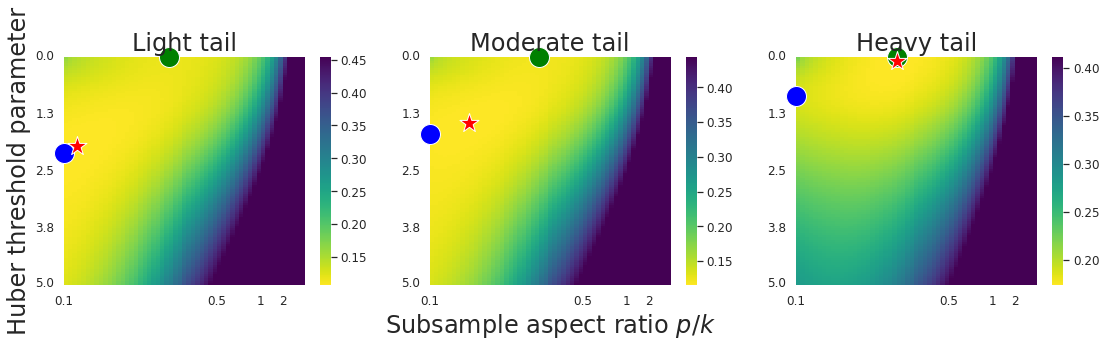

In [10]:
sns.set(font_scale=2.)
fig, axes = plt.subplots(1,3,figsize=(16,5))
cmap = sns.color_palette("viridis_r", as_cmap=True)
title_list = ['Light tail','Moderate tail','Heavy tail']
for j,dist in enumerate(['t-20','t-10','t-2']):

    _df = df_list[j]
    vmin=np.nanquantile(_df.values, 0.01)
    vmax=np.nanquantile(_df.values, 0.8)
    sns.heatmap(_df, cmap=sns.color_palette("viridis_r", as_cmap=True), ax=axes[j], vmin=vmin, vmax=vmax)

    n_grid = 100

    id_psi = _df.apply(np.argmin, axis=1).values

    id_c = np.where(np.array(_df.columns)==_df.iloc[0,::-1].idxmin())[0]
    id_lam = np.where(np.array(_df.index)==_df.iloc[:,0].idxmin())[0]

    axes[j].scatter(id_c, 0, color='green', s=400, 
            marker='o', edgecolor='white',clip_on=False, zorder=5)
    axes[j].scatter(0, id_lam, color='blue', s=400, 
            marker='o', edgecolor='white',clip_on=False, zorder=5)

    ids = np.where(_df.values==_df.values.min())
    axes[j].scatter(ids[1][0], ids[0][0], color='red', s=400, 
               marker='*', edgecolor='white',clip_on=False, zorder=5)
    print(_df.iloc[0,id_c].values[0], _df.iloc[id_lam,-1].values[0], _df.values[ids[0][0],ids[1][0]])
    if j==1:
        axes[j].set_xlabel('Subsample aspect ratio $p/k$')
    else:
        axes[j].set_xlabel('')
    if j==0:
        axes[j].set_ylabel('Huber threshold parameter')
    else:
        axes[j].set_ylabel('')
    axes[j].set_title(title_list[j], zorder=6)

    ticks = [np.argmin(np.abs(np.array(_df.columns)-t)) for t in [0.1,0.5,1.,2]]
    lams = np.array(_df.columns)[ticks]
    axes[j].set_xticks(ticks)
    axes[j].set_xticklabels([ f"{x:.01f}" if x<1 else f"{x:.0f}" for x in lams ], rotation=0, fontsize=12)

    ticks = np.append(np.arange(0,n_grid,25), n_grid-1)
    lams = np.array(_df.index)[ticks]
    axes[j].set_yticks(ticks)
    axes[j].set_yticklabels([ f"{x:.01f}" if x<1 else f"{x:.1f}" for x in lams ], fontsize=12)
    axes[j].figure.axes[-1].tick_params(labelsize=12)


fig.tight_layout()
# fig.subplots_adjust(top=0.85)
plt.savefig('result/fig_huber_l1_sigma_{:.01f}_lam_{:.02f}.pdf'.format(sigma,lam), bbox_inches='tight', pad_inches=0, dpi=300)


## Figure 14: Heatmap with fixed Huber threshold parameter $\mu$

In [11]:
path_result = 'result/huber_l1/fixed_mu/'
sigma = 1.
mu = 10
df_list = []
for dist in ['t-20','t-10','t-2']:
    df = pd.read_csv(path_result+'res_{}_sigma_{:.01f}.csv'.format(dist, sigma))
    
    df = df[df['mu']==mu].reset_index(drop=True)
    df['psi'] = 1/(df['delta']*df['c'])
    df_alpha = pd.pivot(df, index='lam', columns='psi', values='alpha')
    df_eta = pd.pivot(df, index='lam', columns='psi', values='etaG')
    _df = df_alpha**2 * df_eta
    df_list.append(_df)

0.1064683809710648 0.6596925190439551 0.1064683809710648
0.11611403810599004 0.6705626015363116 0.11611403810599004
0.5257553080866669 0.8862954733824205 0.3368053249367466


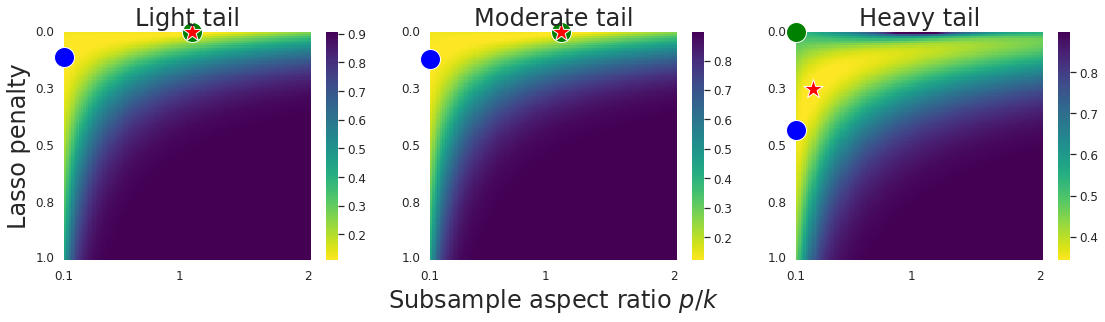

In [12]:
sns.set(font_scale=2.)
fig, axes = plt.subplots(1,3,figsize=(16,5))
cmap = sns.color_palette("viridis_r", as_cmap=True)
title_list = ['Light tail','Moderate tail','Heavy tail']
for j,dist in enumerate(['t-20','t-10','t-2']):
    _df = df_list[j]
    vmin=np.nanquantile(_df.values, 0.01)
    vmax=np.nanquantile(_df.values, 0.8)
    sns.heatmap(_df, cmap=sns.color_palette("viridis_r", as_cmap=True), ax=axes[j], vmin=vmin, vmax=vmax)

    n_grid = 100

    id_psi = _df.apply(np.argmin, axis=1).values

    id_c = np.where(np.array(_df.columns)==_df.iloc[0,::-1].idxmin())[0]
    id_lam = np.where(np.array(_df.index)==_df.iloc[:,0].idxmin())[0]

    axes[j].scatter(id_c, 0, color='green', s=400, 
            marker='o', edgecolor='white',clip_on=False, zorder=5)
    axes[j].scatter(0, id_lam, color='blue', s=400, 
            marker='o', edgecolor='white',clip_on=False, zorder=5)

    ids = np.where(_df.values==_df.values.min())
    axes[j].scatter(ids[1][0], ids[0][0], color='red', s=400, 
               marker='*', edgecolor='white',clip_on=False, zorder=5)
    print(_df.iloc[0,id_c].values[0], _df.iloc[id_lam,-1].values[0], _df.values[ids[0][0],ids[1][0]])
    if j==1:
        axes[j].set_xlabel('Subsample aspect ratio $p/k$')
    else:
        axes[j].set_xlabel('')
    if j==0:
        axes[j].set_ylabel('Lasso penalty')
    else:
        axes[j].set_ylabel('')
    axes[j].set_title(title_list[j], zorder=6)

    ticks = [np.argmin(np.abs(np.array(_df.columns)-t)) for t in [0.1,1.,2]]
    lams = np.array(_df.columns)[ticks]
    axes[j].set_xticks(ticks)
    axes[j].set_xticklabels([ f"{x:.01f}" if x<1 else f"{x:.0f}" for x in lams ], rotation=0, fontsize=12)

    ticks = np.append(np.arange(0,n_grid,25), n_grid-1)
    lams = np.array(_df.index)[ticks]
    axes[j].set_yticks(ticks)
    axes[j].set_yticklabels([ f"{x:.01f}" if x<1 else f"{x:.1f}" for x in lams ], fontsize=12)
    axes[j].figure.axes[-1].tick_params(labelsize=12)


fig.tight_layout()
plt.savefig('result/fig_huber_l1_sigma_{:.01f}_mu_{:.02f}.pdf'.format(sigma,mu), bbox_inches='tight', pad_inches=0, dpi=300)


# Lasso

## Figure 4: Prediction risks of the full ensemble lassoless and ridgeless at different subsample aspect ratios

In [13]:
sigma = 1.; sigma2=sigma**2
phi_list = np.unique(np.round(np.logspace(-1, 1, 50), 2))
rho = 2; rho2=rho**2
df = pd.DataFrame()
for eps in [0.9, 0.01]:
    for method in ['lassoless','ridgeless']:
        for phi in phi_list:
            path_result = 'result/lasso/opt/{:.02f}_{:.02f}/'.format(eps, rho)
            _df = pd.read_pickle(path_result+'res_{}_{:.02f}.pkl'.format(method, phi), compression='gzip')
            _df = _df.drop_duplicates(['phi','psi','lam'])
            _df = _df[_df['lam']==0]
            _df['Rinf'] = np.round(_df['Rinf'], 6)
            _df['eps'] = eps; _df['rho'] = rho
            _df['method'] = method
            df = pd.concat([df, _df], axis=0)
df = df[df['phi']==0.31].reset_index(drop=True)
df['R1'] -= sigma2
df['Rinf'] -= sigma2

df = df[~((1<df['psi'])&(df['psi']<1.05))]


['lassoless', 'ridgeless', 'lassoless', 'ridgeless', 'lassoless', 'ridgeless']


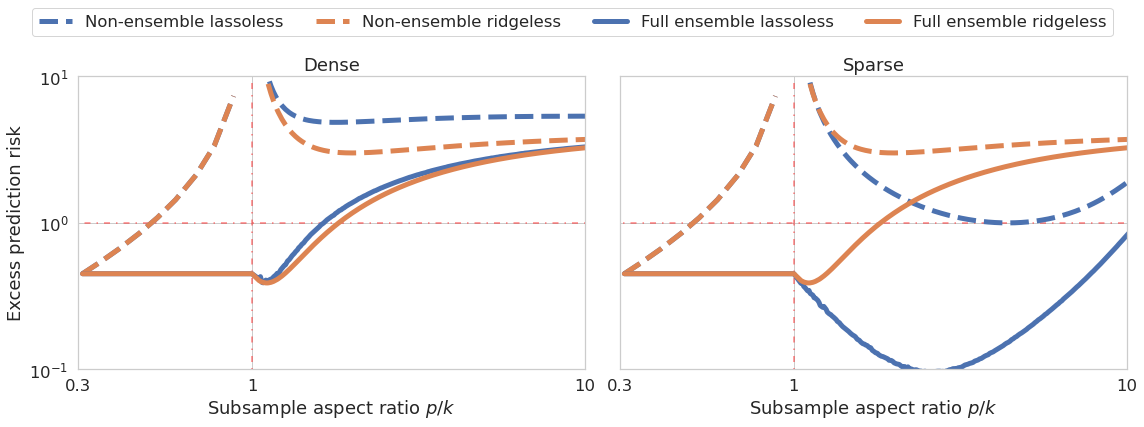

In [14]:
import matplotlib
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

ylim_list = np.array([[0.05, 0.8], [0.05, 0.8]]) + sigma2
style_order = ['Optimal bagged with repalcement', 'Optimal bagged without repalcement', 'Unbagged']
title_list = ['Dense', 'Sparse']

fig, axes = plt.subplots(1,2,figsize=(16,6), sharex=True, sharey=True,
                        gridspec_kw={'width_ratios': [1, 1]})

cm = sns.color_palette('deep', len(style_order))
lw = 5
for j, eps in enumerate([0.9,0.01]):
    axes[j].plot(
            np.ones(10), 
            np.linspace(1e-3, 1e2,10), dashes=[1, 4, 4, 4], color='red', alpha=0.5)

    axes[j].plot(np.linspace(1e-3, 1e1,10), np.ones(10), 
        dashes=[1, 4, 4, 4], color='red', alpha=0.5)

    sns.lineplot(data=df[(df['eps']==eps)&(df['psi']<=1)], x='psi', y='R1', hue='method', linewidth=lw,
             linestyle='--', color=sns.color_palette("Paired")[0], ax=axes[j])
    sns.lineplot(data=df[(df['eps']==eps)&(df['psi']>1)], x='psi', y='R1', hue='method', linewidth=lw,
             linestyle='--', color=sns.color_palette("Paired")[0], ax=axes[j])
    sns.lineplot(data=df[df['eps']==eps], x='psi', y='Rinf', hue='method', linewidth=lw,
                ax=axes[j], color=sns.color_palette()[0])
    axes[j].legend(loc='lower right')
    axes[j].set_title(title_list[j])
    axes[j].set_xscale('log', base=10)
    axes[j].set_xlim([0.3,10])
    axes[j].set_ylim([1e-1,10])
    axes[j].set_yscale('log', base=10)
    ticks = [0.3,1.,10]
    axes[j].set_xticks(ticks, ['0.3','1','10'])
    axes[j].set_ylabel('')


lines_labels = [ax.get_legend_handles_labels() for ax in [axes[1]]]
handles, labels = [sum(lol, []) for lol in zip(*lines_labels)]
print(labels)
for j in range(2):
    axes[j].set_xlabel('Subsample aspect ratio $p/k$')
    axes[j].get_legend().remove()
axes[0].set_ylabel('Excess prediction risk')

handles = handles[2:]
labels = ['Non-ensemble lassoless', 'Non-ensemble ridgeless', 'Full ensemble lassoless', 'Full ensemble ridgeless']
legend = fig.legend(handles=handles, labels=labels, loc=9, ncol=9)
legend_title_left(legend)

fig.tight_layout()
fig.subplots_adjust(top=0.82)

plt.savefig('result/fig_opt_risk_{:.02f}.pdf'.format(rho), bbox_inches='tight', pad_inches=0, dpi=300)

## Figure 5: Optimal subsample aspect ratio in data aspect ratio

In [15]:
sigma = 1.; sigma2=sigma**2
phi_list = np.unique(np.round(np.logspace(-1, 1, 50), 2))

df_lam = pd.DataFrame()
df = pd.DataFrame()
for eps in [0.9, 0.01]:
    for rho in [2.]:
        rho2=rho**2
        
        for phi in phi_list:
            path_result = 'result/lasso/opt/{:.02f}_{:.02f}/'.format(eps, rho)
            _df = pd.read_pickle(path_result+'res_lasso_{:.02f}.pkl'.format(phi), compression='gzip')
            _df = _df.drop_duplicates(['phi','psi','lam'])
            _df['Rinf'] = np.round(_df['Rinf'], 6)
            _df['eps'] = eps; _df['rho'] = rho
            df_lam = pd.concat([df_lam, _df], axis=0)
        
        for phi in phi_list:
            path_result = 'result/lasso/opt/{:.02f}_{:.02f}/'.format(eps, rho)
            _df = pd.read_pickle(path_result+'res_lassoless_{:.02f}.pkl'.format(phi), compression='gzip')
            _df = _df.drop_duplicates(['phi','psi','lam'])
            _df = _df[_df['lam']==0]    
            _df['Rinf'] = np.round(_df['Rinf'], 6)
            _df['eps'] = eps; _df['rho'] = rho            
            df = pd.concat([df, _df], axis=0)

        
df_lam = df_lam.reset_index(drop=True)
df = df.reset_index(drop=True)


opt_lam = df_lam.loc[df_lam.groupby(['eps','rho','phi'])['R1'].idxmin()]
opt_lam['R1'] -= sigma2
opt = df[df['psi'] == df['phi']]
opt.loc[:,'R1'] -= sigma2
opt_wr = df.loc[df.groupby(['eps','rho','phi'])['Rinf'].idxmin()]
opt_wr.loc[:,'Rinf'] -= sigma2

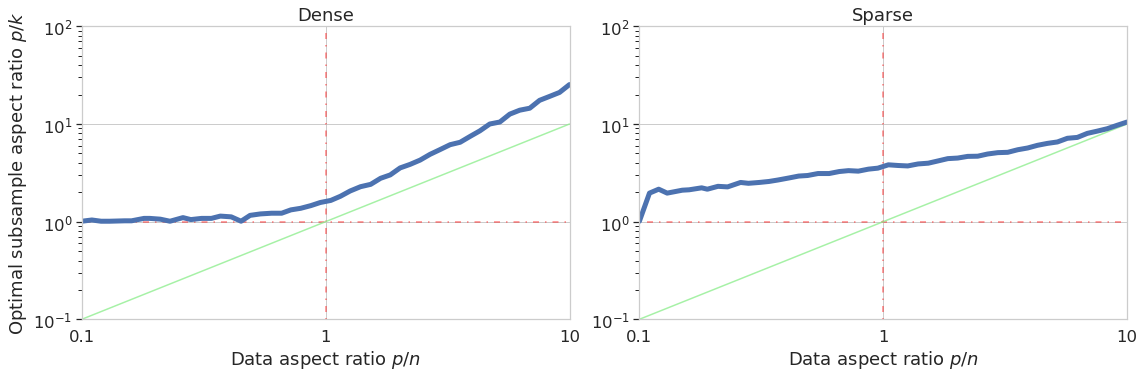

In [16]:
import matplotlib
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

title_list = ['Dense', 'Sparse']
ylim_list = np.array([[0.05, 0.8], [0.05, 0.8]]) + sigma2
y_text_list = [ylim_list[0][1]*0.95, ylim_list[1][0]*1.1]
style_order = ['Optimal bagged with repalcement', 'Optimal bagged without repalcement', 'Unbagged']

fig, axes = plt.subplots(1,2,figsize=(16,6), sharex=True, sharey=False,
                        gridspec_kw={'width_ratios': [1, 1]})

cm = sns.color_palette('deep', len(style_order))
lw = 5
for j, eps in enumerate([0.9,0.01]):
    axes[j].plot(
            np.ones(10), 
            np.linspace(1e-3, 1e2,10), dashes=[1, 4, 4, 4], color='red', alpha=0.5)

    axes[j].plot(np.linspace(1e-3, 1e1,10), np.ones(10), 
        dashes=[1, 4, 4, 4], color='red', alpha=0.5)

    axes[j].plot([1e-2,10], [1e-2,10], linestyle='-', color='lightgreen', alpha=.8)
    sns.lineplot(data=opt_wr[(opt_wr['eps']==eps)&(opt_wr['rho']==2)], x='phi', y='psi', linewidth=lw, label='Optimal lassoless ensemble', 
                ax=axes[j], color=sns.color_palette()[0])
    axes[j].set_title(title_list[j])

    axes[j].yaxis.tick_left()
    axes[j].set_ylabel("")
    axes[j].set_ylim([0.1,100])
    axes[j].set_yscale('log', base=10)

axes[j].set_xscale('log', base=10)
axes[j].set_xlim([0.1,10])
ticks = np.logspace(-1,1,3)
axes[j].set_xticks(ticks, ['0.1','1','10'])


lines_labels = [ax.get_legend_handles_labels() for ax in [axes[1]]]
handles, labels = [sum(lol, []) for lol in zip(*lines_labels)]
for j in range(2):
    axes[j].set_xlabel('Data aspect ratio $p/n$')
    axes[j].get_legend().remove()
axes[0].set_ylabel('Optimal subsample aspect ratio $p/k$')

fig.tight_layout()
fig.subplots_adjust(top=0.82)

plt.savefig('result/fig_lasso_opt_psi_{:.02f}.pdf'.format(rho), bbox_inches='tight', pad_inches=0, dpi=300)

## Figure 10: Optimal risk in data aspect ratio

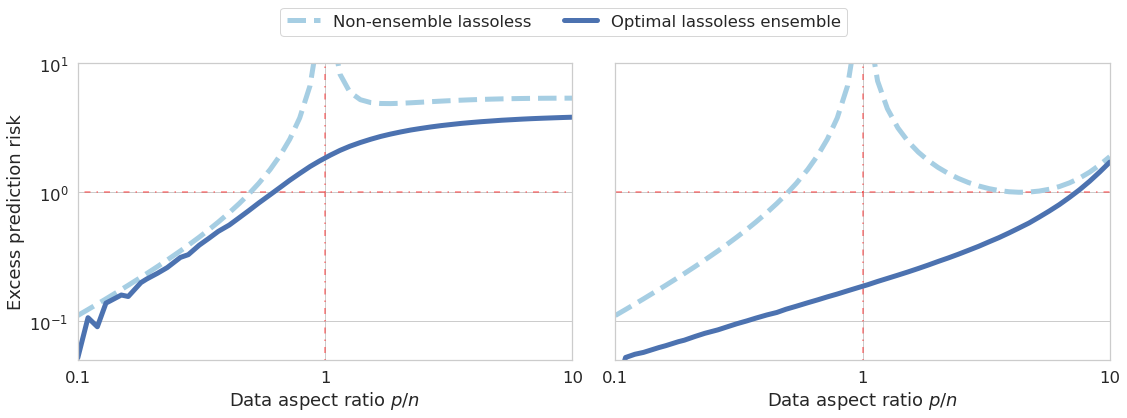

In [17]:
import matplotlib
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

ylim_list = np.array([[0.05, 0.8], [0.05, 0.8]]) + sigma2
y_text_list = [ylim_list[0][1]*0.95, ylim_list[1][0]*1.1]
style_order = ['Optimal bagged with repalcement', 'Optimal bagged without repalcement', 'Unbagged']

fig, axes = plt.subplots(1,2,figsize=(16,6), sharex=True, sharey=True,
                        gridspec_kw={'width_ratios': [1, 1]})

cm = sns.color_palette('deep', len(style_order))
for j, eps in enumerate([0.9,0.01]):
    axes[j].plot(
            np.ones(10), 
            np.linspace(1e-3, 1e2,10), dashes=[1, 4, 4, 4], color='red', alpha=0.5)

    axes[j].plot(np.linspace(1e-3, 1e1,10), np.ones(10), 
        dashes=[1, 4, 4, 4], color='red', alpha=0.5)

    sns.lineplot(data=opt[(opt['eps']==eps)&(opt['phi']<1.)], x='phi', y='R1', linewidth=lw, #label='Unbagged',
             linestyle='--', color=sns.color_palette("Paired")[0], ax=axes[j])
    sns.lineplot(data=opt[(opt['eps']==eps)&(opt['phi']>1.)], x='phi', y='R1', linewidth=lw, label='Non-ensemble lassoless',
                linestyle='--', color=sns.color_palette("Paired")[0], ax=axes[j])
    sns.lineplot(data=opt_wr[opt_wr['eps']==eps], x='phi', y='Rinf', linewidth=lw, label='Optimal lassoless ensemble', 
                ax=axes[j], color=sns.color_palette()[0])
    axes[j].legend(loc='lower right')
    axes[j].set_title('')
    axes[j].set_xscale('log', base=10)
    axes[j].set_xlim([0.1,10])
    axes[j].set_ylim([5e-2,10])
    axes[j].set_yscale('log', base=10)
    ticks = np.logspace(-1,1,3)
    axes[j].set_xticks(ticks, ['0.1','1','10'])
    axes[j].set_ylabel('')


lines_labels = [ax.get_legend_handles_labels() for ax in [axes[1]]]
handles, labels = [sum(lol, []) for lol in zip(*lines_labels)]
for j in range(2):
    axes[j].set_xlabel('Data aspect ratio $p/n$')
    axes[j].get_legend().remove()
axes[0].set_ylabel('Excess prediction risk')

labels = ['Non-ensemble lassoless', 'Optimal lassoless ensemble']
legend = fig.legend(handles=handles, labels=labels, loc=9, ncol=9)
legend_title_left(legend)

fig.tight_layout()
fig.subplots_adjust(top=0.85)

plt.savefig('result/fig_lasso_opt_risk_{:.02f}.pdf'.format(rho), bbox_inches='tight', pad_inches=0, dpi=300)

## Figure 6: Heatmap of the full-ensemble lasso (varying levels of signal sparsity)

1.072296 1.100418 1.072296
1.074689 1.087583 1.071854
1.073359 1.053622 1.053622


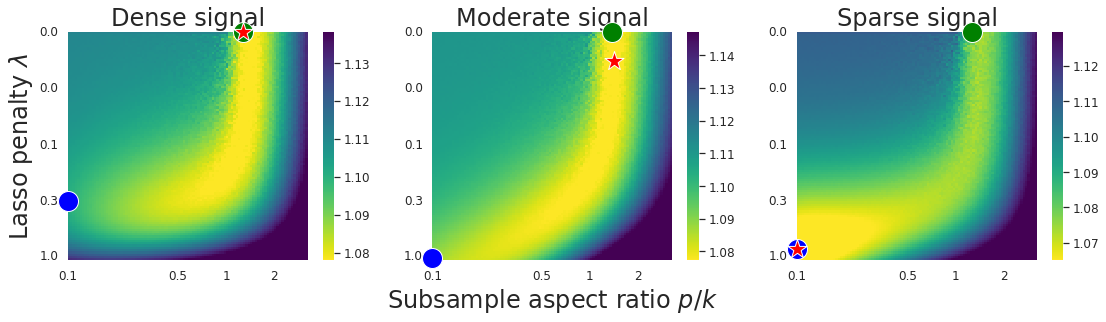

In [18]:
sigma = 2.
phi = 0.1
title_list = ['Dense signal', 'Moderate signal', 'Sparse signal']
fig, axes = plt.subplots(1,3,figsize=(16,5))
cmap = sns.color_palette("viridis_r", as_cmap=True)
sns.set(font_scale=2.)
for j, eps in enumerate([0.9, 0.5, 0.2]):

    path_result = 'result/lasso/equiv/{:.02f}_{:.02f}/'.format(eps, sigma)


    _df = pd.read_pickle(path_result+'res_lasso_risk_{}.pkl'.format(phi), compression='gzip')
    _df = _df.drop_duplicates(['phi','psi','lam'])
    _df['Rinf'] = np.round(_df['Rinf'], 6)
    _df = _df.pivot(index="psi", columns="lam", values='Rinf')

    vmin=np.nanquantile(_df.values, 0.05)
    vmax=np.nanquantile(_df.values, 0.95)


    _df = _df.T
    sns.heatmap(_df, cmap=sns.color_palette("viridis_r", as_cmap=True), vmin=vmin, vmax=vmax, ax=axes[j])

    n_grid = 100
    id_psi = _df.apply(np.argmin, axis=1).values
    id_phis = np.where(np.array(_df.columns)==_df.iloc[0,::-1].idxmin())[0]
    id_lam = np.where(np.array(_df.index)==_df.iloc[:,0].idxmin())[0]
    axes[j].scatter(id_phis, 0, color='green', s=400, 
            marker='o', edgecolor='white',clip_on=False, zorder=5)
    axes[j].scatter(0, id_lam, color='blue', s=400, 
            marker='o', edgecolor='white',clip_on=False, zorder=5)

    ids = np.where(_df.values==_df.values.min())
    axes[j].scatter(ids[1][0], ids[0][0], color='red', s=400,
               marker='*', edgecolor='white',clip_on=False, zorder=5)
    print(_df.iloc[0,id_phis].values[0], _df.iloc[id_lam,0].values[0], _df.values[ids[0][0],ids[1][0]])

    if j==1:
        axes[j].set_xlabel('Subsample aspect ratio $p/k$')
    else:
        axes[j].set_xlabel('')
    if j==0:
        axes[j].set_ylabel('Lasso penalty $\lambda$')
    else:
        axes[j].set_ylabel('')

    ticks = [np.argmin(np.abs(np.array(_df.columns)-t)) for t in [0.1,0.5,1.,2]]
    lams = np.array(_df.columns)[ticks]
    axes[j].set_xticks(ticks)
    axes[j].set_xticklabels([ f"{x:.01f}" if x<1 else f"{x:.0f}" for x in lams ], rotation=0, fontsize=12)

    ticks = np.append(np.arange(0,n_grid,25), n_grid-1)
    lams = np.array(_df.index)[ticks]
    axes[j].set_yticks(ticks)
    axes[j].set_yticklabels([ f"{x:.01f}" if x<1 else f"{x:.1f}" for x in lams ], fontsize=12)
    axes[j].figure.axes[-1].tick_params(labelsize=12)
    axes[j].set_title(title_list[j])
    
fig.tight_layout()
plt.savefig('result/fig_lasso_{:.01f}.pdf'.format(phi), bbox_inches='tight', pad_inches=0.1, dpi=300)


## Figure 11: Heatmap of the full-ensemble lasso (varying SNRs)

2.475953 2.220934 2.220934
1.627912 1.693216 1.626162
1.338655 1.39483 1.338348


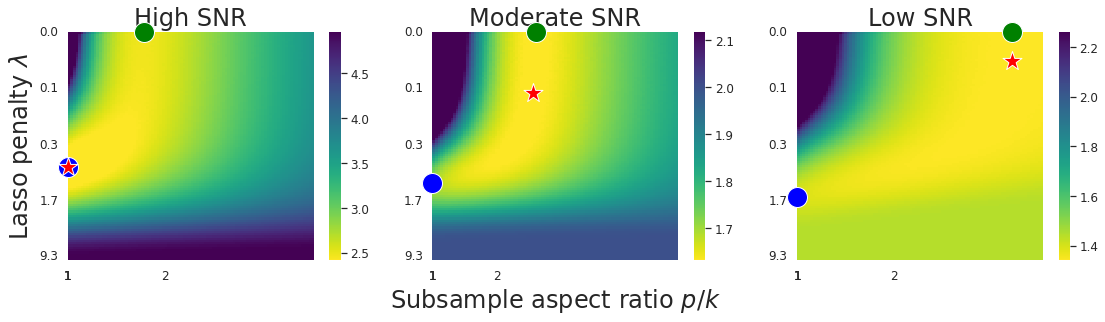

In [19]:
eps = 0.2
phi = 1.1

title_list = ['High SNR', 'Moderate SNR', 'Low SNR']

fig, axes = plt.subplots(1,3,figsize=(16,5))
cmap = sns.color_palette("viridis_r", as_cmap=True)
sns.set(font_scale=2.)
for j, sigma in enumerate([0.5, 1, 1.5]):

    path_result = 'result/lasso/equiv/{:.02f}_{:.02f}/'.format(eps, sigma)


    _df = pd.read_pickle(path_result+'res_lasso_risk_{}.pkl'.format(phi), compression='gzip')
    _df = _df.drop_duplicates(['phi','psi','lam'])
    _df['Rinf'] = np.round(_df['Rinf'], 6)
    _df = _df.pivot(index="psi", columns="lam", values='Rinf')

    vmin=np.nanquantile(_df.values, 0.05)
    vmax=np.nanquantile(_df.values, 0.95)


    _df = _df.T
    sns.heatmap(_df, cmap=sns.color_palette("viridis_r", as_cmap=True), vmin=vmin, vmax=vmax, ax=axes[j])

    n_grid = 100
    id_psi = _df.apply(np.argmin, axis=1).values
    id_phis = np.where(np.array(_df.columns)==_df.iloc[0,::-1].idxmin())[0]
    id_lam = np.where(np.array(_df.index)==_df.iloc[:,0].idxmin())[0]
    axes[j].scatter(id_phis, 0, color='green', s=400, 
            marker='o', edgecolor='white',clip_on=False, zorder=5)
    axes[j].scatter(0, id_lam, color='blue', s=400, 
            marker='o', edgecolor='white',clip_on=False, zorder=5)

    ids = np.where(_df.values==_df.values.min())
    axes[j].scatter(ids[1][0], ids[0][0], color='red', s=400,
               marker='*', edgecolor='white',clip_on=False, zorder=5)
    print(_df.iloc[0,id_phis].values[0], _df.iloc[id_lam,0].values[0], _df.values[ids[0][0],ids[1][0]])

    if j==1:
        axes[j].set_xlabel('Subsample aspect ratio $p/k$')
    else:
        axes[j].set_xlabel('')
    if j==0:
        axes[j].set_ylabel('Lasso penalty $\lambda$')
    else:
        axes[j].set_ylabel('')

    ticks = [np.argmin(np.abs(np.array(_df.columns)-t)) for t in [0.1,0.5,1.,2]]
    lams = np.array(_df.columns)[ticks]
    axes[j].set_xticks(ticks)
    axes[j].set_xticklabels([ f"{x:.01f}" if x<1 else f"{x:.0f}" for x in lams ], rotation=0, fontsize=12)

    ticks = np.append(np.arange(0,n_grid,25), n_grid-1)
    lams = np.array(_df.index)[ticks]
    axes[j].set_yticks(ticks)
    axes[j].set_yticklabels([ f"{x:.01f}" if x<1 else f"{x:.1f}" for x in lams ], fontsize=12)
    axes[j].figure.axes[-1].tick_params(labelsize=12)
    axes[j].set_title(title_list[j])
    
fig.tight_layout()
plt.savefig('result/fig_lasso_{:.01f}.pdf'.format(phi), bbox_inches='tight', pad_inches=0.1, dpi=300)


## Figure 7: Optimal lasso vs optimal lasso ensemble

In [20]:
sigma = 1.; sigma2=sigma**2
rho = 0.5; rho2=rho**2
phi_list = np.unique(np.round(np.logspace(-1, 1, 50), 2))

res = []
for eps in [0.9, .5, 0.2]:
    
    df = pd.DataFrame()
    for phi in phi_list:
        try:
            path_result = 'result/lasso/opt_2/{:.02f}_{:.02f}/'.format(eps, rho)
            _df = pd.read_pickle(path_result+'res_lasso_{:.02f}.pkl'.format(phi), compression='gzip')
            _df = _df.drop_duplicates(['phi','psi','lam'])
            _df['Rinf'] = np.round(_df['Rinf'], 6)
            df = pd.concat([df, _df], axis=0)
        except:
            pass
    df = df.reset_index(drop=True)

    df_lam = df[df['phi']==df['psi']]
    df_psi = df[df['lam']==0.]

    opt_lam = df_lam.loc[df_lam.groupby('phi')['R1'].idxmin()]
    opt_lam['R1'] -= sigma2
    opt = df[df['psi'] == df['phi']]
    opt['R1'] -= sigma2
    opt_wr = df.loc[df.groupby('phi')['Rinf'].idxmin()]
    opt_wr['Rinf'] -= sigma2

    opt_psi = df_psi.loc[df_psi.groupby('phi')['Rinf'].idxmin()]
    opt_psi['Rinf'] -= sigma2
    
    res.append([opt, opt_wr, opt_lam, opt_psi])

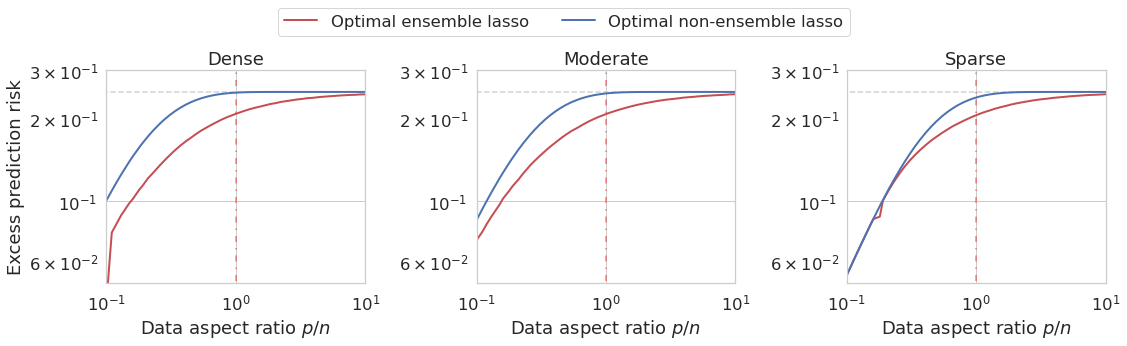

In [21]:
import matplotlib
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

title_list = ['Dense', 'Moderate', 'Sparse']
style_order = ['Optimal bagged with repalcement', 'Optimal bagged without repalcement', 'Unbagged']

fig, axes = plt.subplots(1,3,figsize=(16,5), sharex=True, sharey=False,
                        gridspec_kw={'width_ratios': [1, 1, 1]})

cm = sns.color_palette('deep', len(style_order))
lw = 2
for j in range(3):
    axes[j].plot(
            np.ones(10), 
            np.linspace(1e-3, 1e2,10), dashes=[1, 4, 4, 4], color='red', alpha=0.5)
    axes[j].hlines(rho2, 0, 10, linestyles='--', color='lightgray')

    opt, opt_wr, opt_lam, opt_psi = res[j]
    sns.lineplot(data=opt_wr, x='phi', y='Rinf', linewidth=lw, label='Optimal ensemble lasso', 
                ax=axes[j], color=sns.color_palette()[3])
    sns.lineplot(data=opt_lam, x='phi', y='R1', linewidth=lw, label='Optimal non-ensemble lasso', 
                ax=axes[j], color=sns.color_palette()[0])
    axes[j].legend(loc='lower right')

    axes[j].set_xscale('log', base=10)

    axes[j].set_xlim([0.1,10])
    axes[j].set_ylim([5e-2,0.3])
    axes[j].set_yscale('log', base=10)

    axes[j].set_ylabel("")
    axes[j].set_title(title_list[j])

axes[0].set_ylabel('Excess prediction risk')

lines_labels = [ax.get_legend_handles_labels() for ax in [axes[1]]]
handles, labels = [sum(lol, []) for lol in zip(*lines_labels)]
for j in range(3):
    axes[j].set_xlabel('Data aspect ratio $p/n$')
    axes[j].get_legend().remove()
legend = fig.legend(handles=handles, labels=labels, loc=9, ncol=9)
legend_title_left(legend)

fig.tight_layout()
fig.subplots_adjust(top=0.8)

plt.savefig('result/fig_lasso_risk_opt.pdf', bbox_inches='tight', pad_inches=0, dpi=300)

## Figure 8: Fixed-point quantities

In [22]:
path_result = 'result/lassoless/'
method = 'lassoless'
# sigma = 1.
eps = 0.2
df = pd.DataFrame()
for sigma in [0.5, 1., 1.2]:
    df_thm = pd.read_csv('{}res_risk_{}_eps_{:.02f}_sigma_{:.02f}.csv'.format(
            path_result, method, eps, sigma))
    df_thm['atau'] = df_thm['a'] * df_thm['tau']
    df_thm['sigma'] = sigma
    df = pd.concat([df, df_thm], axis=0)
df.loc[df['phi']==1., 'tau'] =10    

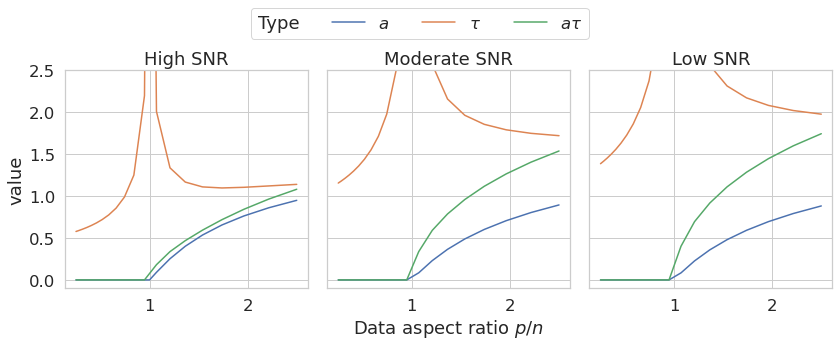

In [23]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

fig, axes = plt.subplots(1, 3, figsize=(12,5), sharex=True, sharey=True)

title_list = ['High SNR', 'Moderate SNR', 'Low SNR']
for j, sigma in enumerate([0.5, 1., 1.2]):
    df_thm = df[df['sigma']==sigma]
    ax = axes[j]
    sns.lineplot(df_thm, x='phi', y='a', ax=ax, label='$a$')
    sns.lineplot(df_thm, x='phi', y='tau', ax=ax, label=r'$\tau$')
    sns.lineplot(df_thm, x='phi', y='atau', ax=ax, label=r'$a\tau$')
    if j ==1:
        axes[j].set_xlabel('Data aspect ratio $p/n$')
    else:
        axes[j].set_xlabel('')
    axes[j].set_title(title_list[j])
axes[0].set_ylabel('value')
axes[0].legend()
axes[0].set_ylim([-0.1,2.5])
lines_labels = [ax.get_legend_handles_labels() for ax in [axes[0]]]
handles, labels = [sum(lol, []) for lol in zip(*lines_labels)]
for j in range(3):
    axes[j].get_legend().remove()
legend = fig.legend(handles=handles, labels=labels, title='Type', loc=9, ncol=9)
legend_title_left(legend)

fig.tight_layout()
fig.subplots_adjust(top=0.8)
plt.savefig('result/fig_lassoless_risk.pdf', bbox_inches='tight', pad_inches=0, dpi=300)


## Figure 9: Risk curves in $\psi$

In [24]:
sigma = 1.
eps = .1
lam  = 1e-3

M_list = np.array([1,2,5,50, np.inf])
M_str = np.r_[M_list[:-1].astype(int).astype(str), ['$\infty$']]
palette = sns.color_palette("magma_r", len(M_str))
path_result = 'result/lasso/emp/{:.02f}_{:.02f}/'.format(eps, sigma)

df_the = []
df_est = []
for phi in [.1,1.1]:
    _df = pd.read_pickle(path_result+'res_risk_phi_{:.01f}.pkl'.format(phi), compression='gzip')
    _df = _df.drop_duplicates(['phi','psi','lam'])
    _df['Rinf'] = np.round(_df['Rinf'], 5)
    _df = _df[_df['lam']==lam]

    df = pd.DataFrame(
        np.c_[
            _df['psi'],
            _df['R1'].values[:,None] / M_list[None,:] + _df['Rinf'].values[:,None] * (1-1/M_list[None,:]),
        ], columns=['psi']+['R-{}'.format(M) for M in M_str]
        )

    df = pd.wide_to_long(df,  stubnames='R', i=['psi'], j='M', sep='-', suffix=r'.*').reset_index()
    df_the.append(df)

    df = pd.read_pickle(path_result+'res_est_phi_{:.01f}.pkl'.format(phi), compression='gzip')
    df = df[df['lam']==lam]
    df['M'] = df['M'].astype(int)
    df = df[df['M'].isin(M_list)]
    df_est.append(df)

/tmp/ipykernel_3959705/2283498014.py:12: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.lineplot(_df[_df['psi']>1], x='psi', y='risk', hue='M', linestyle='dashed', marker='o', palette = palette, ax=axes[i])
/tmp/ipykernel_3959705/2283498014.py:12: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.lineplot(_df[_df['psi']>1], x='psi', y='risk', hue='M', linestyle='dashed', marker='o', palette = palette, ax=axes[i])
/tmp/ipykernel_3959705/2283498014.py:17: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.lineplot(_df[_df['psi']<1], x='psi', y='risk', hue='M', linestyle='dashed', marker='o', palette = palette, ax=axes[i])


['1', '2', '5', '50', '$\\infty$', '1', '2', '5', '50', '1', '2', '5', '50']


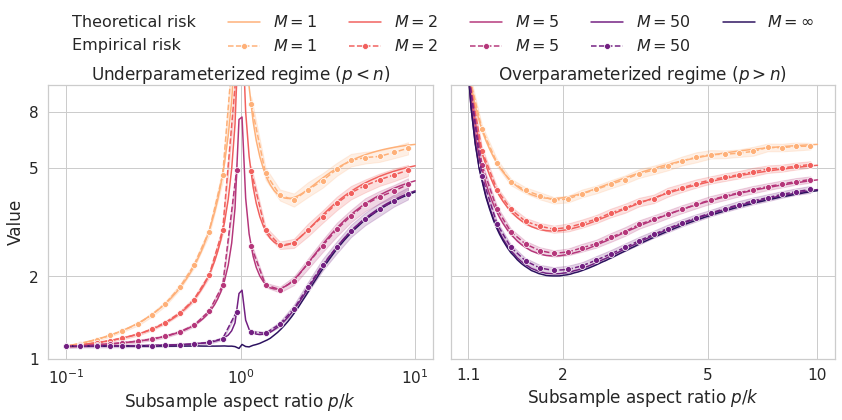

In [25]:
import matplotlib.lines as mlines
sns.set(font_scale=1.4)
sns.set_style("whitegrid")

fig, axes = plt.subplots(1,2, figsize=(12,6), sharey=True)

for i in range(2):
    _df = df_the[i].copy()
    sns.lineplot(_df, x='psi', y='R', hue='M', palette = palette, ax=axes[i])
    _df = df_est[i].copy()
    _df = _df[_df['psi'].isin(np.unique(_df['psi'])[::2])]
    sns.lineplot(_df[_df['psi']>1], x='psi', y='risk', hue='M', linestyle='dashed', marker='o', palette = palette, ax=axes[i])

for i in range(1):
    _df = df_est[i].copy()
    _df = _df[_df['psi'].isin(np.unique(_df['psi'])[::2])]
    sns.lineplot(_df[_df['psi']<1], x='psi', y='risk', hue='M', linestyle='dashed', marker='o', palette = palette, ax=axes[i])

for ax in axes:
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('Subsample aspect ratio $p/k$')
axes[0].set_ylabel('Value')
axes[1].set_ylabel('')

for j in range(2):
    axes[j].set_xticks([])
    axes[j].set_xticks([], minor=True)
    ticks = 10.**np.linspace(-1,1,3) if j==0 else [1.1, 2, 5, 10]
    axes[j].set_xticks(ticks)
    if j ==1:
        axes[j].set_xticklabels(['1.1','2','5','10'])
    
j = 0
axes[j].set_yticks([])
axes[j].set_yticks([], minor=True)
ticks = [1,2,5,8]
axes[j].set_yticks(ticks)
axes[j].set_yticklabels(['{:.0f}'.format(i) for i in ticks])
axes[j].set_ylim([1., 10.])

axes[0].set_title('Underparameterized regime ($p<n$)')
axes[1].set_title('Overparameterized regime ($p>n$)')

lines_labels = [ax.get_legend_handles_labels() for ax in [axes[0]]]
handles, labels = [sum(lol, []) for lol in zip(*lines_labels)]

print(labels)
for j in range(2):
    axes[j].get_legend().remove()
labels = ['Theoretical risk', 'Empirical risk',
          '$M=1$', '$M=1$',
          '$M=2$', '$M=2$',
          '$M=5$', '$M=5$',
          '$M=50$', '$M=50$',
          '$M=\infty$',
          ]
handles = [mlines.Line2D([], [], linestyle='None'), mlines.Line2D([], [], linestyle='None'),
          handles[0], handles[5], 
          handles[1], handles[6], 
          handles[2], handles[7], 
          handles[3], handles[8],
          handles[4],
          ]

legend = fig.legend(handles=handles, labels=labels,
                    loc=9, ncol=6, title='', frameon=False, fontsize=16)
legend_title_left(legend)

fig.tight_layout()
fig.subplots_adjust(top=0.8)
plt.savefig('result/fig_lasso_risk_M_eps_{:.02f}_{:.02f}_lam_{}.pdf'.format(eps, sigma, lam), bbox_inches='tight', pad_inches=0, dpi=300)
